In [2]:
import numpy as np
import numpy.ma as ma
import pandas as pd
import scipy.stats
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
from copy import deepcopy
import bean as be

In [3]:
plt.style.use('jr')
plt.rcParams["pdf.use14corefonts"] = True
matplotlib.rcParams['pdf.fonttype'] = 42 
matplotlib.rcParams["axes.unicode_minus"] = False

In [5]:
bdata = be.read_h5ad("../../../results/filtered_annotated/LDLvar/bean_count_LDLvar_alleleFiltered.h5ad")

In [6]:
bdata.log_norm()

In [7]:
lfcs = bdata.log_fold_change_reps("top", "bot", rep_col="rep", compare_col="bin")

In [8]:
bdata.get_guide_edit_rate()

In [9]:
fake_bdata = deepcopy(bdata)
fake_bdata.X = fake_bdata.layers['edit_rate']

In [10]:
fake_bdata.layers['lognorm_counts'] = np.log(fake_bdata.X)

<ipython-input-10-885bef8a5c6c>:1: RuntimeWarning: divide by zero encountered in log
  fake_bdata.layers['lognorm_counts'] = np.log(fake_bdata.X)


In [11]:
fake_bdata.layers['lognorm_counts']

array([[-0.46430561, -0.65540685, -1.23787436, ..., -0.21130909,
        -0.5260931 , -0.51082562],
       [-0.48115386, -0.28434317, -0.40365187, ..., -0.16862271,
        -0.83173334, -0.12014431],
       [-0.3254224 , -0.34614853, -0.1891243 , ..., -0.25131443,
        -0.50554857, -0.23638878],
       ...,
       [-0.51898893, -0.55315999, -2.8361502 , ..., -1.62596721,
        -1.01160091,        -inf],
       [       -inf, -2.42774824, -2.13350876, ..., -1.33500107,
               -inf, -1.32175584],
       [-0.43804128, -2.30258509,        -inf, ...,        -inf,
        -1.95774461,        -inf]])

In [12]:
edit_rate_ratio = fake_bdata.log_fold_change_reps("top", "bot", rep_col="rep", compare_col="bin").values
median_edit_rate_ratio = np.nanmedian(edit_rate_ratio, axis=1)

/data/pinello/PROJECTS/2021_08_ANBE/software/perturb-tools/perturb_tools/_arithmetic/_funcs/_log_fold_change.py:5: RuntimeWarning: invalid value encountered in subtract
  return mat[:, cond1] - mat[:, cond2]
/data/pinello/SHARED_SOFTWARE/anaconda_latest/envs/jy_anbe_py38/lib/python3.8/site-packages/numpy/core/_methods.py:48: RuntimeWarning: invalid value encountered in reduce
  return umr_sum(a, axis, dtype, out, keepdims, initial, where)
/data/pinello/SHARED_SOFTWARE/anaconda_latest/envs/jy_anbe_py38/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1217: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(a, func=_nanmedian, axis=axis, out=out,


In [13]:
median_top = np.nanmedian(fake_bdata[:,fake_bdata.samples.bin == "top"].X, axis=1)
median_bot = np.nanmedian(fake_bdata[:,fake_bdata.samples.bin == "bot"].X, axis=1)
median_ratio = np.log(median_top) - np.log(median_bot)

/data/pinello/SHARED_SOFTWARE/anaconda_latest/envs/jy_anbe_py38/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1217: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(a, func=_nanmedian, axis=axis, out=out,
/data/pinello/SHARED_SOFTWARE/anaconda_latest/envs/jy_anbe_py38/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1217: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(a, func=_nanmedian, axis=axis, out=out,
<ipython-input-13-09d7bd25b203>:3: RuntimeWarning: divide by zero encountered in log
  median_ratio = np.log(median_top) - np.log(median_bot)
<ipython-input-13-09d7bd25b203>:3: RuntimeWarning: invalid value encountered in subtract
  median_ratio = np.log(median_top) - np.log(median_bot)


In [14]:
median_edit_rate_ratio


array([ 0.24161883, -0.00232771, -0.03206194, ..., -0.51444809,
       -0.19066583, -0.2156429 ])

In [15]:
bdata.guides


,Unnamed: 0,target_variant,Target descriptor,Arbitrary number,gRNA position category,Target base position in gRNA,Target base position in reporter,BE,target_group,sequence,...,5-nt PAM,offset,target,spacer_target_pos,target_group2,masked_sequence,masked_barcode,edit_rate,genomic_pos,chr
name,,,,,,,,,,,,,,,,,,,,,
CONTROL_1_g1,0,CONTROL,NaN,1,g1,4,10,ABE,NegCtrl,CCTACGCGGTAGGGAACTTT,...,GGGAG,-10,CONTROL_1,9,NegCtrl,CCTGCGCGGTGGGGGGCTTT,GTTT,0.465013,NaN,NaN
CONTROL_1_g2,1,CONTROL,NaN,1,g2,5,11,ABE,NegCtrl,CCCTACGCGGTAGGGAACTT,...,TGGGA,-11,CONTROL_1,10,NegCtrl,CCCTGCGCGGTGGGGGGCTT,GGCG,0.810467,NaN,NaN
CONTROL_1_g3,2,CONTROL,NaN,1,g3,5,12,ABE,NegCtrl,CCCTACGCGGTAGGGAACT,...,TTGGG,-12,CONTROL_1,11,NegCtrl,CCCTGCGCGGTGGGGGGCT,CGCT,0.621639,NaN,NaN
CONTROL_1_g4,3,CONTROL,NaN,1,g4,7,13,ABE,NegCtrl,AGCCCTACGCGGTAGGGAAC,...,TTTGG,-13,CONTROL_1,12,NegCtrl,GGCCCTGCGCGGTGGGGGGC,TGGG,0.126516,NaN,NaN
CONTROL_1_g5,4,CONTROL,NaN,1,g5,8,14,ABE,NegCtrl,AAGCCCTACGCGGTAGGGAA,...,CTTTG,-14,CONTROL_1,13,NegCtrl,GGGCCCTGCGCGGTGGGGGG,GTGT,0.258330,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
rs9987289_Maj_ABE_347_g1,3450,rs9987289,Maj,347,g1,3,10,ABE,Variant,GCATCAATATCACGTGGAA,...,CCAGC,-10,rs9987289_Maj_ABE_347,9,Variant,GCGTCGGTGTCGCGTGGGG,CGGT,0.127989,9183358.0,chr8
rs9987289_Maj_ABE_347_g2,3451,rs9987289,Maj,347,g2,4,11,ABE,Variant,GGCATCAATATCACGTGGA,...,ACCAG,-11,rs9987289_Maj_ABE_347,10,Variant,GGCGTCGGTGTCGCGTGGG,TCGC,0.306332,9183358.0,chr8
rs9987289_Maj_ABE_347_g3,3452,rs9987289,Maj,347,g3,6,12,ABE,Variant,TGGGCATCAATATCACGTGG,...,AACCA,-12,rs9987289_Maj_ABE_347,11,Variant,TGGGCGTCGGTGTCGCGTGG,GCGC,0.203854,9183358.0,chr8


In [16]:
def pearson_corr(x, y):
    a=ma.masked_invalid(x)
    b=ma.masked_invalid(y)

    msk = (~a.mask & ~b.mask)
    return(ma.corrcoef(a[msk],b[msk]))

def spearman_corr(x, y):
    return(scipy.stats.spearmanr(x, y, axis=0, nan_policy='omit'))

In [17]:
guide_df = pd.DataFrame({"median_ratio": median_ratio, "edit_rate_ratio":median_edit_rate_ratio, "lfc":lfcs.median(axis=1), "Group":bdata.guides.target_group.values, "Group2": bdata.guides.target_group2.values})

In [22]:
pos_df = guide_df.loc[guide_df.Group == "PosCtrl", :]

In [18]:
pal = sns.color_palette()

In [19]:
var_pal = {"PosCtrl_inc":pal[3], "PosCtrl_dec":pal[0], "Variant":pal[-2], "NegCtrl":pal[-3]}

In [23]:
guide_df['target'] = bdata.guides['target_variant']
strong_pos_df = guide_df.loc[(guide_df.target.isin(["LDLR", "MYLIP"])), :]
negctrl_df = guide_df.loc[guide_df.Group == "NegCtrl", :]

In [24]:
spearman_corrs = []
pvals = []
for df in [guide_df, pos_df, strong_pos_df]:
    a, b = spearman_corr(df.edit_rate_ratio, df.lfc)
    spearman_corrs.append(a)
    pvals.append(b)
spearman_corr_df = pd.DataFrame({"label":["All guides", "Positive controls", "LDLR/MYLIP"], "corr":spearman_corrs, "P-value":pvals, })
spearman_corr_df.to_csv("2c_jackpot_corr.csv")

In [25]:
spearman_corr_df

,label,corr,P-value
0,All guides,0.025395,0.181971
1,Positive controls,0.127246,0.007262
2,LDLR/MYLIP,0.315082,0.000715


/data/pinello/SHARED_SOFTWARE/anaconda_latest/envs/jy_anbe_py38/lib/python3.8/site-packages/seaborn/distributions.py:1185: UserWarning: The following kwargs were not used by contour: 's'
  cset = contour_func(
WARNING @ Sat, 19 Aug 2023 16:27:53:
	 findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial 

WARNING @ Sat, 19 Aug 2023 16:27:53:
	 findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial 

WARNING @ Sat, 19 Aug 2023 16:27:53:
	 findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial 

WARNING @ Sat, 19 Aug 2023 16:27:53:
	 findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial 

WARNING @ Sat, 19 Aug 2023 16:27:53:
	 findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial 

WARNING @ Sat, 19 Aug 2023 16:27:53:
	 findfont: Generic fam

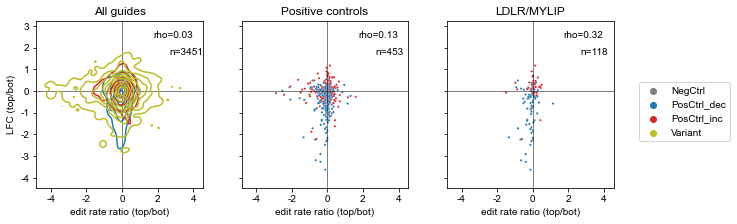

In [32]:
fig, axs = plt.subplots(1, 3, figsize=(9,3), sharex=True, sharey=True)
for i, df in enumerate([guide_df, pos_df, strong_pos_df]):
    ax = axs[i]
    ax.axhline(0, c='black', linewidth=0.5)
    ax.axvline(0, c='black', linewidth=0.5)
    ax.set_box_aspect(1)
    if i == 0:
        sns.kdeplot(guide_df, x="edit_rate_ratio", y="lfc", hue="Group2", s=1, palette=var_pal, ax = ax)
    else:
        sns.scatterplot(df, x="edit_rate_ratio", y="lfc", hue="Group2", palette=var_pal, ax = ax, s=5, alpha = 0.2 if i == 0 else 1, rasterized=True)
    ax.set_xlabel("edit rate ratio (top/bot)")
    ax.set_ylabel("LFC (top/bot)")
    ax.set_title(f"{spearman_corr_df.label[i]}")
    ax.text(0.7, 0.9, f"rho={spearman_corr_df['corr'][i]:.2f}", transform=ax.transAxes)
    ax.text(0.8, 0.8, f"n={len(df)}", transform=ax.transAxes)
    ax.get_legend().remove()
    
handles, labels = axs[-1].get_legend_handles_labels()
fig.legend(handles[:4], labels[:4], bbox_to_anchor=(1, 0.5), loc='center left')
    
plt.tight_layout()
fig.savefig("c_jackpot_scatter.pdf", bbox_inches='tight')

In [33]:
guide_df.to_csv("jackpot_analysis.csv")